In [21]:
##declare utilities
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.multivariate.manova import MANOVA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda

In [23]:
##load the data
filename = input('Feed me Data\n')
df=pd.read_csv(filename)
df.head(2)

,key,seed,maxLiqRatio,askFactor,cushionFactor,wall,cushion,mintSyncPremium,withReinstateWindow,withDynamicRR,avg_netflow,dev_netflow
0,669_1067,669,0.150,0.09,0.450,0.20,0.15,3,No,Yes,-8722.990325,2.460444e+06
1,213_1151,213,0.475,0.09,0.225,0.24,0.13,3,Yes,No,-203662.197183,2.019560e+06


KeyboardInterrupt: 

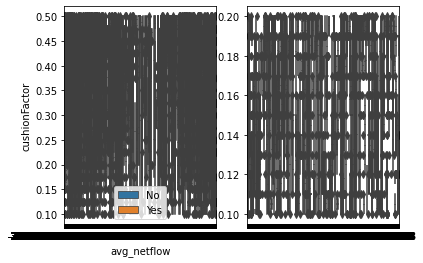

In [14]:
##fancy charts, but too much data on first load. Still figuring out this library
##fig, axs = plt.subplots(ncols=2)
##sns.boxplot(data=df, x="avg_netflow", y="cushionFactor", hue=df.withReinstateWindow.tolist(), ax=axs[0])
##sns.boxplot(data=df, x="avg_netflow", y="cushion", hue=df.withDynamicRR.tolist(), ax=axs[1])
##plt.show()

In [19]:
##lets Manova, baby
fit = MANOVA.from_formula('maxLiqRatio + askFactor + cushionFactor +wall + cushion + mintSyncPremium  ~ avg_netflow', data=df)
print(fit.mv_test())

##a low P value is a good sign, indicating that the combination of all variables has a significant effect on output
##DO NOT INTERPRET THESE RESULTS,GUYS, THIS IS STILL JUST AN EXPLORATION OF FUNCTIONALITY


                      Multivariate linear model
                                                                      
----------------------------------------------------------------------
       Intercept         Value   Num DF   Den DF     F Value    Pr > F
----------------------------------------------------------------------
          Wilks' lambda   0.0056 6.0000 39630.0000 1162805.3222 0.0000
         Pillai's trace   0.9944 6.0000 39630.0000 1162805.3222 0.0000
 Hotelling-Lawley trace 176.0493 6.0000 39630.0000 1162805.3222 0.0000
    Roy's greatest root 176.0493 6.0000 39630.0000 1162805.3222 0.0000
----------------------------------------------------------------------
                                                                      
-----------------------------------------------------------------------
        avg_netflow        Value   Num DF    Den DF    F Value   Pr > F
-----------------------------------------------------------------------
            Wilks' lambda 

ValueError: Unknown label type: (array([  -8722.99032478, -203662.1971831 , -133797.26548061, ...,
         68866.34172111,  121623.5500603 ,  -30354.06290942]),)